In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

KNN

In [2]:
# splitData is a function that takes a dataframe df, and return the X dataset and y dataset
def SplitData(df): 
    X = df.iloc[:,:5408]
    y = df.iloc[:,5408:5409]
    return X, y

In [3]:
def EuclideanDistance(s1,s2):
    x1,y1 = SplitData(s1)
    x2,y2 = SplitData(s2)
    dist = np.sqrt(np.sum(np.square(x1.values - x2.values)))
    return dist

In [4]:
def GetNeighbors(df_train, df_test, k_num):
    distances = []
    for i in range(len(df)):
        train = df.iloc[i:i+1,:]
        dist = EuclideanDistance(train, df_test)
        distances.append((train, dist))
    distances.sort(key=lambda tup: tup[1]) # sort based on dist
    neighbors = [] 
    for i in range(k_num):
        neighbors.append(distances[i][0])
    return neighbors

In [5]:
def FindMajorityLabel(List):
    return max(set(List), key = List.count)

In [6]:
def MakePrediction(df_train, test, k_num):
    neighbors = GetNeighbors(df_train, test, k_num)       #get k_num neighbors of test dataset
    neighbor_values = [n.iloc[0,5408] for n in neighbors] #get label of each neighbor
    prediction = FindMajorityLabel(neighbor_values)       #make prediction based on majority label in neighbors
    return prediction

In [7]:
def GetLabels(df, k_num, train_size):
    labels = []                            # save predict label and true label in a matrix
    len_train = int(train_size*len(df))
    df_train = df.iloc[:len_train,:]
    df_test = df.iloc[len_train:,:]
    for i in range(len(df_test)):
        test = df_test.iloc[i:i+1,:]
        y_pred = MakePrediction(df_train,test,k_num)
        y_true = df_test.iloc[i,5408]
        labels.append((y_pred,y_true))
    return labels

In [8]:
def ComputeAcc(labels):
    total = len(labels)
    correct = 0
    for y in labels:
        if y[0] == y[1]:
            correct += 1
    acc = correct/total
    return acc

In [9]:
def KNN(df, k_num,train_size):
    labels = GetLabels(df,k_num,train_size)
    acc_knn = ComputeAcc(labels)
    return acc_knn

In [10]:
# I use knn package to run different k as it takes less time.
def KNN2(df, k_num,train_size):
    len_train = int(train_size*len(df))
    df_train = df.iloc[:len_train,:]
    df_test = df.iloc[len_train:,:]
    X_train, y_train = SplitData(df_train)
    X_test, y_test = SplitData(df_test)
    neigh = KNeighborsClassifier(n_neighbors=k_num)
    neigh.fit(X_train, np.ravel(y_train))
    y_pred = neigh.predict(X_test)
    y_true = y_test
    acc_knn = accuracy_score(y_pred, y_true)
    return acc_knn

In [11]:
df = pd.read_csv("cleaned_K8.csv", header = None)

In [12]:
acc_knn = KNN2(df,3,0.7)

In [13]:
acc_knn

0.9891522699879469

acc_knn = 0.993731918997107 when k = 3

get accurancy when k = 3,5,7,9,...,27

In [20]:
df = pd.read_csv("cleaned_K8.csv", header = None)
accs = []
for i in range(1,15):
    k = 2*i + 1
    print(k)
    acc_knn = KNN2(df,k,0.7)
    accs.append(acc_knn)

3
5
7
9
11
13
15
17
19
21
23
25
27
29


In [21]:
accs

[0.9891522699879469,
 0.9895540377661711,
 0.9891522699879469,
 0.9889513860988349,
 0.9895540377661711,
 0.9895540377661711,
 0.9891522699879469,
 0.9891522699879469,
 0.9891522699879469,
 0.9891522699879469,
 0.9891522699879469,
 0.9891522699879469,
 0.9891522699879469,
 0.9891522699879469]

plot

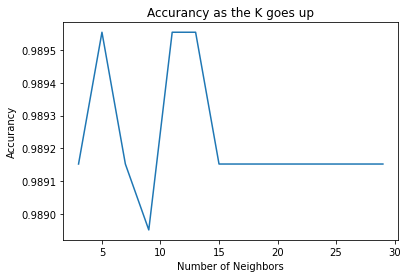

In [22]:
x = [2*i+1 for i in range(1,15)]
y = accs

plt.xlabel('Number of Neighbors')
plt.ylabel('Accurancy')
plt.title('Accurancy as the K goes up')

plt.plot(x,y)

plt.show()

SVM

In [4]:
def SVM(df, split_ratio):
    #make sure that data is shuffled to avoid bias
    size_train = int(split_ratio * len(df))
    df_train, df_test = df.head(size_train), df.iloc[size_train:,:]
    
    X_train, y_train = df_train.iloc[:,:df_train.shape[1] - 1], df_train.iloc[:,df_train.shape[1] - 1]
    X_test, y_test = df_test.iloc[:,:df_test.shape[1] - 1], df_test.iloc[:,df_test.shape[1] - 1]
    print(X_train, y_train)
    
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    return accuracy_score(y_test, predicted)

In [2]:
df = pd.read_csv("cleaned_K8.csv", header = None)

In [5]:
acc_svm = SVM(df,0.7)

        0      1      2      3      4      5      6      7      8      9     \
0     -0.161 -0.014  0.002 -0.036 -0.033 -0.093  0.025  0.005  0.000 -0.015   
1     -0.158 -0.002 -0.012 -0.025 -0.012 -0.106  0.013  0.005  0.000 -0.002   
2     -0.169 -0.025 -0.010 -0.041 -0.045 -0.069  0.038  0.014  0.008 -0.014   
3     -0.183 -0.051 -0.023 -0.077 -0.092 -0.015  0.071  0.027  0.020 -0.019   
4     -0.154  0.005 -0.011 -0.013 -0.002 -0.115  0.005  0.002 -0.003  0.002   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
11609 -0.158 -0.006 -0.006 -0.026 -0.019 -0.104  0.016  0.006  0.001 -0.007   
11610 -0.178 -0.041  0.004 -0.060 -0.077 -0.059  0.054  0.015  0.012 -0.025   
11611 -0.158  0.003 -0.025 -0.033 -0.007 -0.098  0.012  0.007  0.002  0.004   
11612 -0.178 -0.031  0.005 -0.049 -0.059 -0.100  0.041  0.009  0.004 -0.025   
11613 -0.163 -0.013 -0.007 -0.037 -0.027 -0.096  0.023  0.007  0.002 -0.011   

       ...   5398   5399   5400   5401   5402   540

In [6]:
acc_svm

0.9891522699879469